In [2]:
# 3.27 Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


1916928/2110848 [==========================>...] - ETA: 0s

In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
len(train_data)

8982

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
# Decoding the integer sequences back into sentences

# word_index is a dictionary mapping words to an integer index
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

507904/550378 [==========================>...] - ETA: 0s

In [8]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[10]

3

In [10]:
# 3.32. Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to be 1s
    return results

# Our vectorized training_data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
# 3.33 One-hot encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)

# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
# 3.34 One-hot encoding the labels, the Keras way
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
# 3.35 Our model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
# 3.36 Compiling our model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
# 3.37 Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [16]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.3704 - a

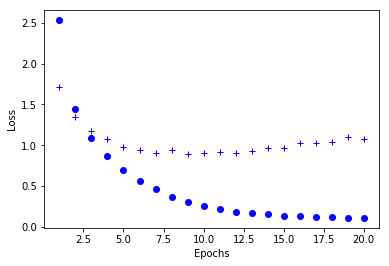

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blot dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for blue crosses
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

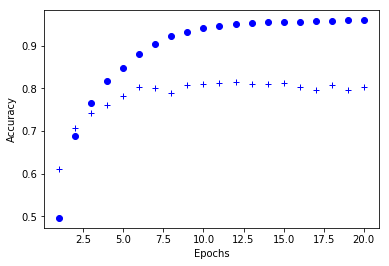

In [18]:
plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blot dot"
plt.plot(epochs, acc_values, 'bo')
# b+ is for blue crosses
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# 3.41 Re-training a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512, 
                   validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 8982 samples, validate on 1000 samples
Epoch 1/9
8982/8982 [==============================] - 1s - loss: 0.0708 - acc: 0.9811 - val_loss: 0.0456 - val_acc: 0.9867
Epoch 2/9
8982/8982 [==============================] - 1s - loss: 0.0405 - acc: 0.9891 - val_loss: 0.0325 - val_acc: 0.9913
Epoch 3/9
8982/8982 [==============================] - 1s - loss: 0.0309 - acc: 0.9917 - val_loss: 0.0254 - val_acc: 0.9929
Epoch 4/9
8982/8982 [==============================] - 1s - loss: 0.0250 - acc: 0.9932 - val_loss: 0.0198 - val_acc: 0.9944
Epoch 5/9
8982/8982 [==============================] - 1s - loss: 0.0204 - acc: 0.9943 - val_loss: 0.0158 - val_acc: 0.9954
Epoch 6/9
8982/8982 [==============================] - 1s - loss: 0.0168 - acc: 0.9950 - val_loss: 0.0136 - val_acc: 0.9961
Epoch 7/9
8982/8982 [==============================] - 1s - loss: 0.0141 - acc: 0.9958 - val_loss: 0.0107 - val_acc: 0.9971
Epoch 8/9
8982/8982 [==============================] - 1s - loss: 0.0117 - acc: 0.99

In [20]:
results = model.evaluate(x_test, one_hot_test_labels)

1920/2246 [========================>.....] - ETA: 0s

In [21]:
results

[0.032836736509126947, 0.99136632033362515]

In [22]:
# 3.43 Accuracy of a random baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19723953695458593

In [23]:
# 3.44 Generating predictions for new data
predictions = model.predict(x_test)

In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

1.0000001

In [29]:
np.argmax(predictions[0])

3

In [32]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [33]:
y_train = np.array(train_labels)

In [34]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])